In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as mno

data = pd.DataFrame()
'''
for i in range(2023, 2024):
    for j in range (11,13):
        url = f"https://acqa.u-angers.fr/data/{i}/{j}"
        response = requests.get(url)
        temp_data = pd.read_csv(url, sep=';')
        # Convert "date" column to datetime format
        temp_data['date'] = pd.to_datetime(temp_data['date'], format='%Y-%m-%d %H:%M:%S')
        # Concatenate the file data with existing data in the DataFrame object
        data = pd.concat([data, temp_data])
'''

start_date = '2024-01-01'

for i in range(2024, 2025):
    for j in range(0, 2):
        url = f"https://acqa.u-angers.fr/data/{i}/{j}"
        response = requests.get(url)
        temp_data = pd.read_csv(url, sep=';')
        # Convert "date" column to datetime format
        temp_data['date'] = pd.to_datetime(temp_data['date'], format='%Y-%m-%d %H:%M:%S')
        # Concatenate the file data with existing data in the DataFrame object
        data = pd.concat([data, temp_data])

In [2]:
# Get the current system date and time and convert them to a string in the format "YYYY-MM-DD HH:MM:SS"
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")

# Loop through sensor names
# 'FABLAB1', 'FABLAB2', 'FABLAB3', 'FABTEST4', 'FABTEST3', 'FABTEST4', 'STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE', 'BUREAU_ALAIN'
for sensor_name in ['STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE']:

    # Extract data for sensor
    Variable = data[data.sensor == sensor_name]
    # Create a pandas DataFrame object to store the extracted data, using the "date" column as an index
    data_frame_to_export = pd.DataFrame.from_records(Variable, index='date')
    # Add empty rows for the dates: start of monitoring and end of monitoring (to have dataframes of the same size for all sensors)
    data_frame_to_export.loc[datetime(2024, 1, 1, 0, 0, 0)] = ['', '', '', '' ,'', '','','','','','','','','','','']
    data_frame_to_export.loc[datetime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')] = ['', '', '', '' ,'', '','','','','','','','','','','']
    data_frame_to_export = data_frame_to_export.sort_index()
    # Export the extracted data to an Excel file with the sensor name
    data_frame_to_export.to_excel(sensor_name + ".xlsx")

In [3]:
# Retrieving the current date and time
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Loop through the list of sensor names
for sensor_name in ['STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE']:
    date_file = f"/content/{sensor_name}.xlsx"
    # Reading data from Excel file and formatting index
    data_to_convert = pd.read_excel(str(date_file), index_col='date')
    data_to_convert.index = pd.to_datetime(data_to_convert.index, format='%Y-%m-%d %H:%M:%S')


    # Calculating the average of the data for each 10 minute period
    mean_data = data_to_convert.loc[start_date : dt_string, ['co2', 'temperature', 'humidity', 'voc', 'c2h5oh', 'co', 'no2', 'sound', 'light', 'pm1.0', 'pm2.5', 'pm10']].resample('10min').agg(['mean'])
    mean_data.columns = mean_data.columns.droplevel(level=1)
    # Saving results to an Excel file
    mean_data.to_excel("mean_" + str(sensor_name) + ".xlsx")


In [4]:
# Create empty pandas DataFrames to store data for each parameter
co2 = pd.DataFrame()
temperature = pd.DataFrame()
humidity = pd.DataFrame()
voc = pd.DataFrame()
c2h5oh = pd.DataFrame()
co = pd.DataFrame()
no2 = pd.DataFrame()
sound = pd.DataFrame()
light = pd.DataFrame()
pm1 = pd.DataFrame()
pm2_5 = pd.DataFrame()
pm10 = pd.DataFrame()

# For each parameter, extract data from the corresponding Excel file and store in the appropriate DataFrames
for sensor_name in ['STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE']:
    date_file = f"/content/mean_{sensor_name}.xlsx"
    mean_data = pd.read_excel(str(date_file), index_col='date')

    co2[sensor_name] = mean_data['co2']
    temperature[sensor_name] = mean_data['temperature']
    humidity[sensor_name] = mean_data['humidity']
    voc[sensor_name] = mean_data['voc']
    c2h5oh[sensor_name] = mean_data['c2h5oh']
    co[sensor_name] = mean_data['co']
    no2[sensor_name] = mean_data['no2']
    sound[sensor_name] = mean_data['sound']
    light[sensor_name] = mean_data['light']
    pm1[sensor_name] = mean_data['pm1.0']
    pm2_5[sensor_name] = mean_data['pm2.5']
    pm10[sensor_name] = mean_data['pm10']

# Export each DataFrame to a separate Excel file
co2.to_excel("All_Co2.xlsx")
temperature.to_excel("All_temperature.xlsx")
humidity.to_excel("All_humidity.xlsx")
voc.to_excel("All_voc.xlsx")
c2h5oh.to_excel("All_c2h5oh.xlsx")
co.to_excel("All_co.xlsx")
no2.to_excel("All_no2.xlsx")
sound.to_excel("All_sound.xlsx")
light.to_excel("All_light.xlsx")
pm1.to_excel("All_pm1.xlsx")
pm2_5.to_excel("All_pm2_5.xlsx")
pm10.to_excel("All_pm10.xlsx")

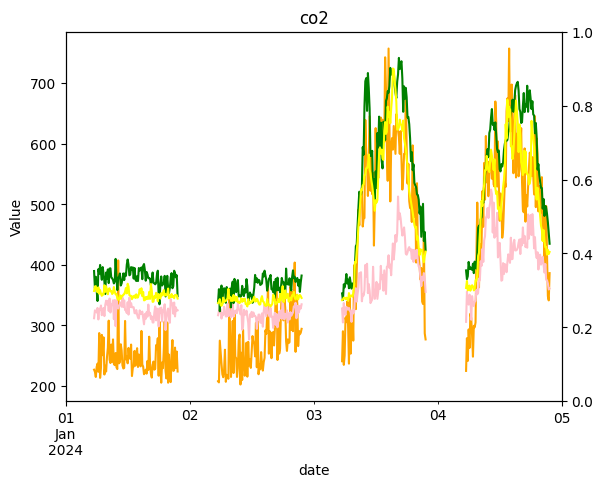

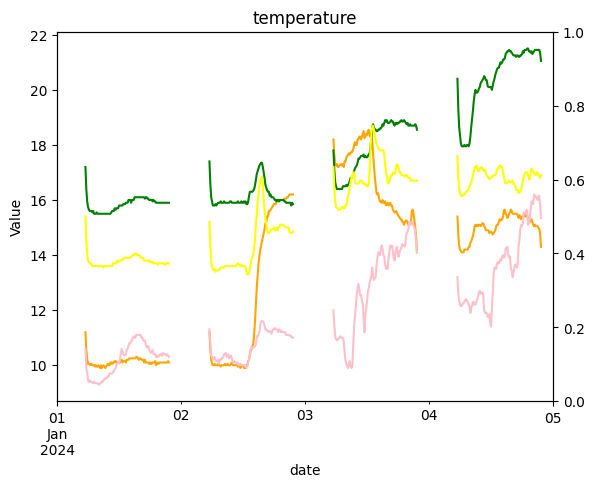

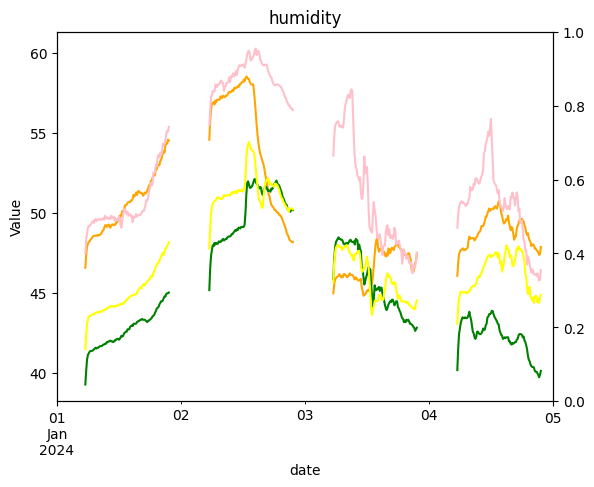

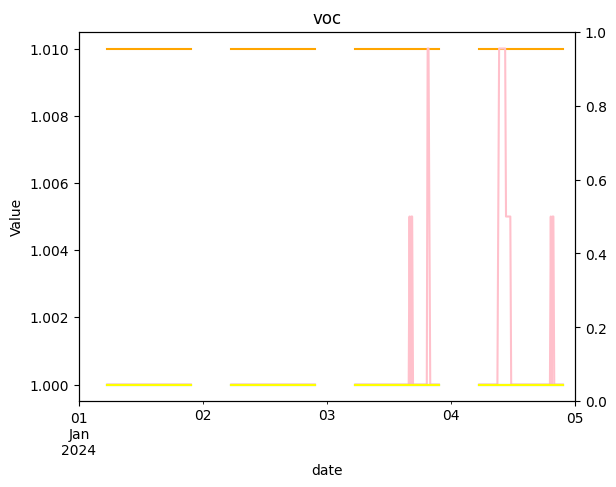

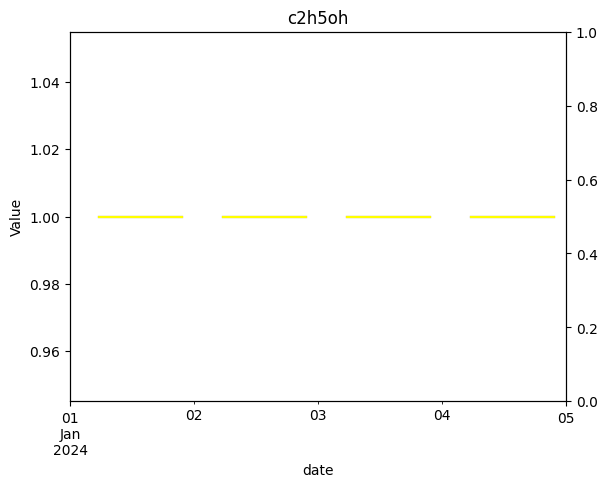

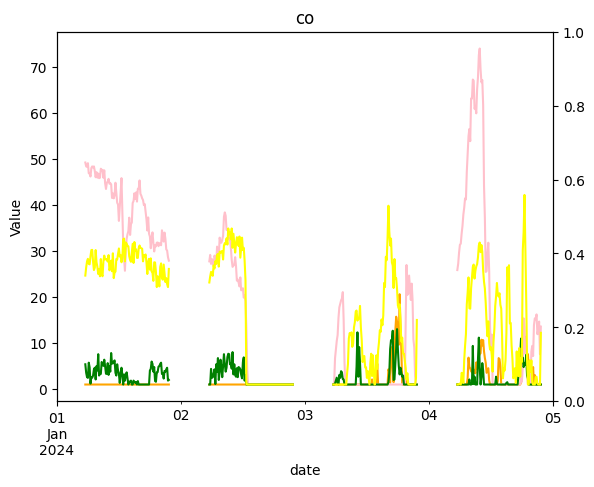

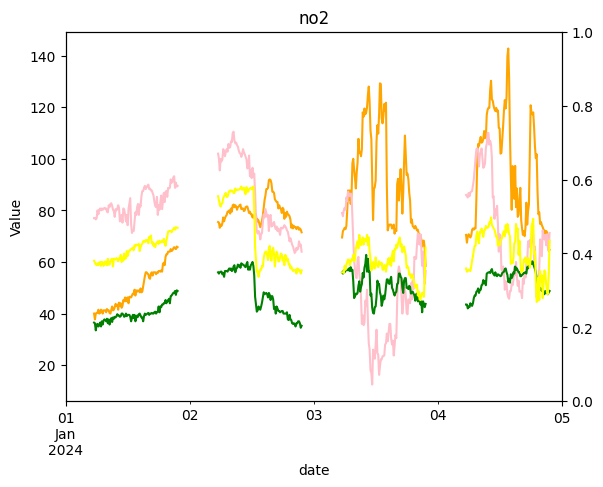

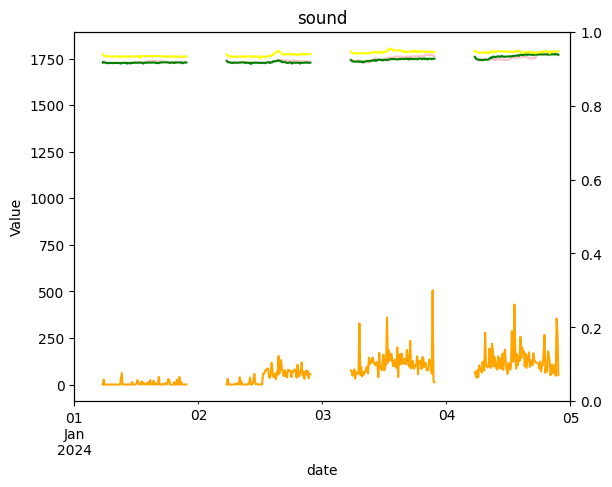

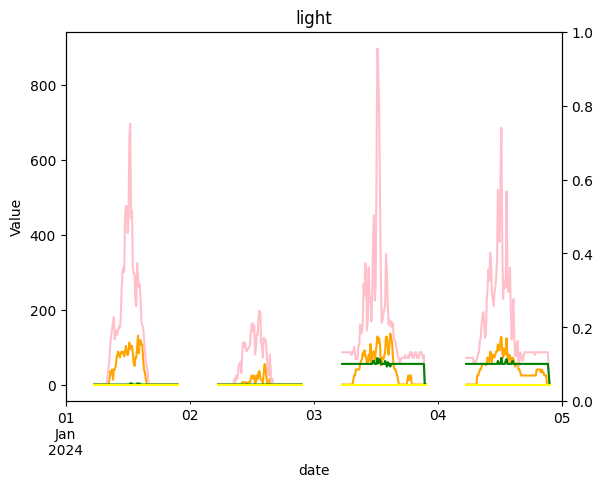

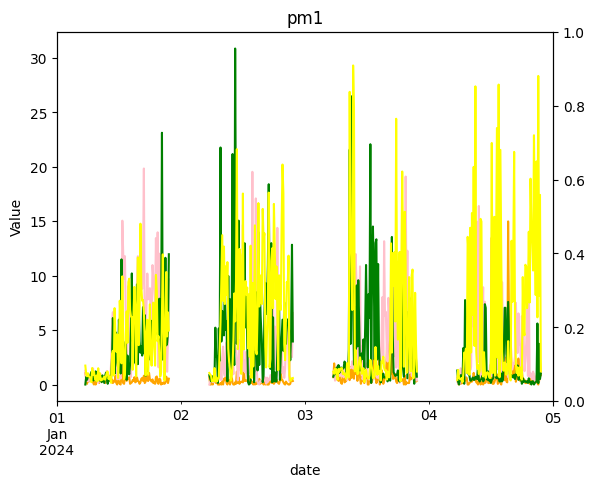

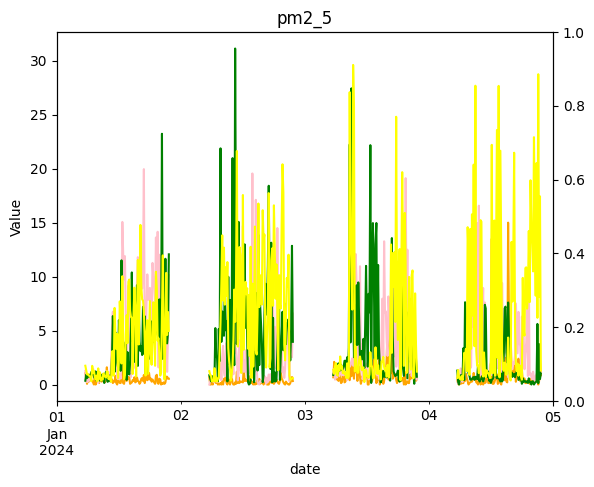

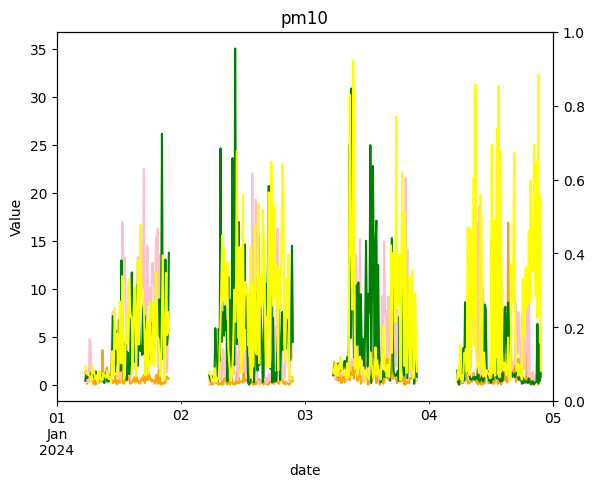

In [5]:
# Creating a list of tuples containing each variable and its name
data_frames = [(co2, 'co2'), (temperature, 'temperature'), (humidity, 'humidity'), (voc, 'voc'), (c2h5oh, 'c2h5oh'), (co, 'co'), (no2, 'no2'), (sound, 'sound'), (light, 'light'), (pm1, 'pm1'), (pm2_5, 'pm2_5'), (pm10, 'pm10')]
# Loop over each tuple in the list
for p, name in data_frames:
    # Plotting the time series for each sensor for a given date
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    p.loc[start_date+' 00:00' : '2024-01-05 00:00', 'STSORANGE'].plot(ax= ax1 ,color='orange')
    p.loc[start_date+' 00:00' : '2024-01-05 00:00', 'STSROSE'].plot(ax= ax1 ,color='pink')
    p.loc[start_date+' 00:00' : '2024-01-05 00:00', 'STSVERT'].plot(ax= ax1 ,color='green')
    p.loc[start_date+' 00:00' : '2024-01-05 00:00', 'STSJAUNE'].plot(ax= ax1 ,color='yellow')
    #presence.loc['2022-09', 'Visiteurs presents  '].plot(ax= ax2 ,color='black')
    plt.xlabel('Date')
    ax1.set_ylabel('Value')
    #ax2.set_ylabel('Nombre de Visiteurs presents')
    plt.title(name)
    plt.show()